In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\train.csv")
test = pd.read_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\test.csv")

In [3]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [7]:
train.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [8]:
train.Marital_Status.unique()

array([0, 1], dtype=int64)

In [9]:
train.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [10]:
train.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [11]:
train.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [12]:
train.User_ID.unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [13]:
train.Product_ID.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [14]:
train.Gender.unique()

array(['F', 'M'], dtype=object)

In [15]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
train.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

# Handling Missing Values

In [17]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [18]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
mean = 5.276542

In [21]:
imputer =  SimpleImputer(missing_values=np.nan,strategy=mean)

In [22]:
train_num = train.select_dtypes(exclude= object)

In [23]:
train_cat = train.select_dtypes(include = object)

In [24]:
print("We have:",train_num.shape,"Numerical Variaable")
print("We have:", train_cat.shape,"categorical variable")

We have: (550068, 7) Numerical Variaable
We have: (550068, 5) categorical variable


In [25]:
for i in train_num:
    train[i].fillna(train[i].mean(),inplace = True)

In [26]:
for i in train_cat:
    train[i].fillna(train[i].mode()[0], inplace = True)

In [27]:
#Finding_Outlier

In [28]:
import seaborn as sns

In [29]:
#BOXPLOT

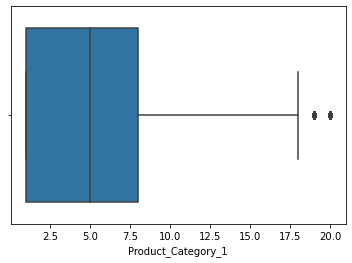

In [30]:
sns.boxplot(x = train["Product_Category_1"])

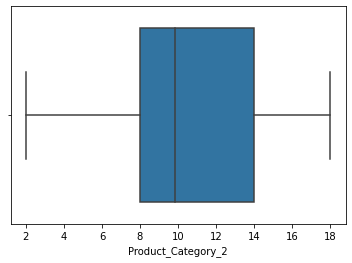

In [31]:
sns.boxplot(x = train["Product_Category_2"])

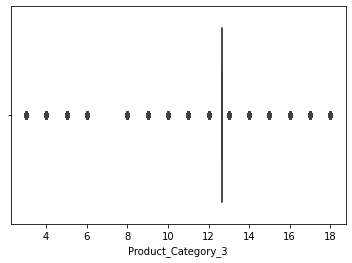

In [32]:
sns.boxplot(x = train["Product_Category_3"])

In [33]:
#SCATTERPLOT

In [34]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Purchase')

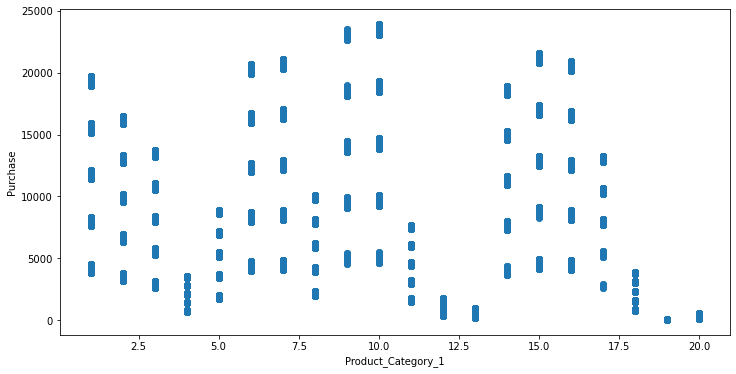

In [35]:
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(train["Product_Category_1"],train["Purchase"])
ax.set_xlabel("Product_Category_1")
ax.set_ylabel("Purchase")

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x000001B89733D978>>

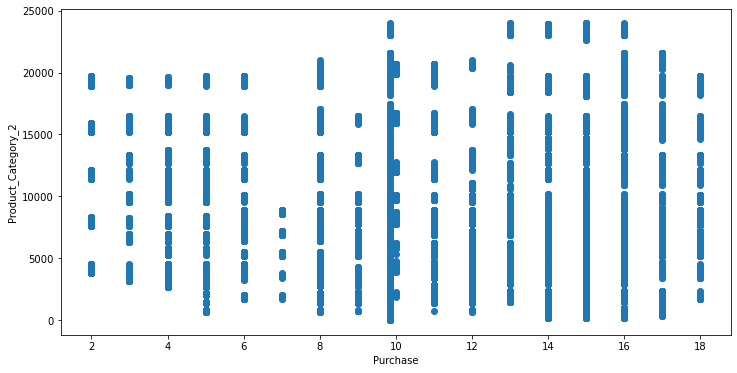

In [36]:
fig,az = plt.subplots(figsize = (12,6))
az.scatter(train["Product_Category_2"],train["Purchase"])
az.set_xlabel("Purchase")
az.set_ylabel("Product_Category_2")
az.plot


Text(0, 0.5, 'Purchase')

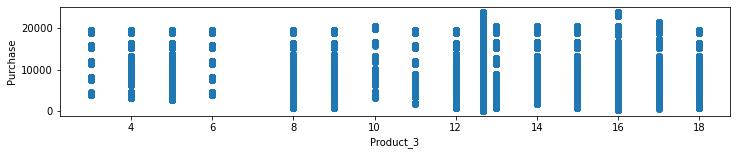

In [37]:
fig,az = plt.subplots(figsize =(12,2))
az.scatter(train["Product_Category_3"],train["Purchase"])
az.set_xlabel("Product_3")
az.set_ylabel("Purchase")

In [38]:
#Finding outlier in z test to detect outlier

In [39]:
from scipy import stats
import numpy as np

In [ ]:
z = np.abs(stats.zscore(train))

In [ ]:
print(z)